# 1. Импорт нужных библиотек

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [81]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [128]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [134]:
games[games['Name'] == 'Monopoly']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
658,Monopoly,PC,1994.0,Misc,1.49,0.81,0.0,0.10,NaN,NaN,NaN
913,Monopoly,Wii,2008.0,Misc,0.86,0.83,0.0,0.20,70.0,7.8,E
1250,Monopoly,PS,1997.0,Misc,1.18,0.27,0.0,0.05,NaN,NaN,NaN
3383,Monopoly,X360,2008.0,Misc,0.34,0.20,0.0,0.06,56.0,5.8,E
4522,Monopoly,PS2,2008.0,Misc,0.21,0.16,0.0,0.05,NaN,7.2,E
5390,Monopoly,PS3,2008.0,Misc,0.25,0.05,0.0,0.04,54.0,6.7,E
6341,Monopoly,DS,2010.0,Misc,0.15,0.09,0.0,0.02,NaN,tbd,NaN
7398,Monopoly,N64,1999.0,Misc,0.17,0.04,0.0,0.00,NaN,NaN,NaN


In [138]:
games.loc[games['Platform'] == 'XOne', 'User_Score'].isna().mean()

0.21862348178137653

In [140]:
games.loc[games['Platform'] == 'PC', 'User_Score'].isna().mean()

0.1591375770020534

In [155]:
games.loc[
    (games['Platform'] == 'PC') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float).mean()

7.062467532467546

In [157]:
games.loc[
    (games['Platform'] == 'PC') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float).std()

1.529963117639507

In [187]:
pc_sample = games.loc[
    (games['Platform'] == 'PC') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float)

xone_sample = games.loc[    
    (games['Platform'] == 'XOne') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float)

In [ ]:
0.0005% < 5% => mean(PC) > mean(XOne)


In [195]:
val =4.935072360183565e-06

print(f"{val*100:.6f}%")

0.000494%


In [ ]:
p-value = P(T_stat > 4.65)
T-stat ~ T-распр(n1+n2-2)

In [188]:
ttest_ind(pc_sample, xone_sample, equal_var=False)

Ttest_indResult(statistic=4.653422798410772, pvalue=4.935072360183565e-06)

In [156]:
games.loc[    
    (games['Platform'] == 'XOne') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float).mean()

6.52142857142857

In [158]:
games.loc[    
    (games['Platform'] == 'XOne') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float).std()

1.3809405645921442

In [ ]:
games.loc[    
    (games['Platform'] == 'XOne') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float)

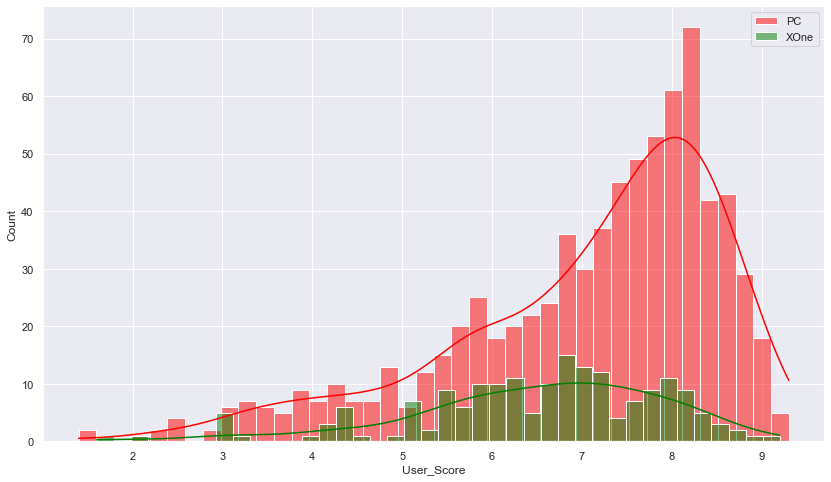

In [165]:
plt.figure(figsize=(14,8))
sns.histplot(
    games.loc[
        (games['Platform'] == 'PC') 
        & ~games['User_Score'].isna() 
        & (games['User_Score'] != 'tbd'),
        'User_Score'
    ].astype(float), color='red', label='PC', kde=True, bins=40)

sns.histplot(games.loc[    
    (games['Platform'] == 'XOne') 
    & ~games['User_Score'].isna() 
    & (games['User_Score'] != 'tbd'),
    'User_Score'
].astype(float), color='green', label='XOne', kde=True, bins=40)

plt.legend()

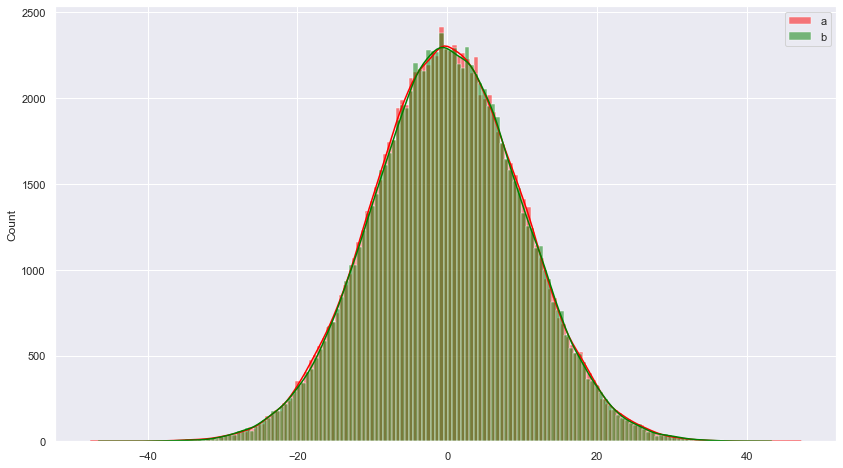

In [186]:
plt.figure(figsize=(14,8))
sns.histplot(a, color='red', label='a', kde=True)
sns.histplot(b, color='green', label='b', kde=True)
plt.legend()

In [185]:
a = np.random.normal(loc=0, scale=10, size=100000)
b = np.random.normal(loc=0, scale=10, size=100000)
a.mean(), b.mean()

(-0.013916361675594749, 0.04128866636422236)

In [176]:
sts.ttest_ind(a, b)

Ttest_indResult(statistic=-0.649206808799563, pvalue=0.5169570602777986)

In [ ]:
x, y. 

H0: mean(X) = mean(Y)

In [121]:
?sns.histplot

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

<AxesSubplot:xlabel='Year_of_Release', ylabel='Count'>

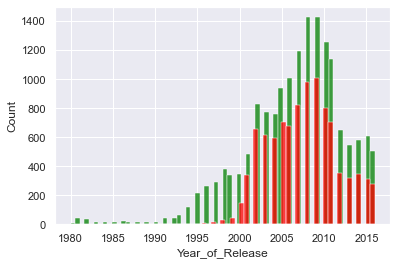

In [136]:
sns.histplot(games['Year_of_Release'], color='green')
sns.histplot(games.loc[~games['Rating'].isna(), 'Year_of_Release'], color='red')

In [116]:
games.pivot_table(index=['Platform', 'Genre', 'Rating'], values='Name', aggfunc='count')

Name
Platform Genre     Rating      
3DS      Action    E         24
                   E10+      37
                   M          6
                   T         13
         Adventure E          2
...                         ...
XOne     Sports    E         22
                   E10+       5
                   T          7
         Strategy  E          1
                   T          1

[595 rows x 1 columns]

In [108]:
games[~games['Name'].isna() & games['Name'].str.contains('FIFA')].sort_values('Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13302,2002 FIFA World Cup,GC,2002.0,Sports,0.04,0.01,0.00,0.00,78.0,7.7,E
7820,2002 FIFA World Cup,XB,2002.0,Sports,0.14,0.04,0.00,0.01,79.0,9,E
3395,2002 FIFA World Cup,PS2,2002.0,Sports,0.21,0.17,0.16,0.06,73.0,5.6,E
2429,2010 FIFA World Cup South Africa,X360,2010.0,Sports,0.32,0.42,0.02,0.09,83.0,8.1,E
4211,2010 FIFA World Cup South Africa,PSP,2010.0,Sports,0.09,0.22,0.03,0.12,69.0,7.4,E
...,...,...,...,...,...,...,...,...,...,...,...
3524,FIFA World Cup Germany 2006,PS2,2006.0,Sports,0.47,0.02,0.00,0.08,77.0,8.1,E
14306,FIFA World Cup: Germany 2006,GBA,2006.0,Sports,0.02,0.01,0.00,0.00,57.0,6.9,E
3456,FIFA: Road to World Cup 98,N64,1997.0,Sports,0.15,0.39,0.00,0.03,NaN,NaN,NaN
2788,FIFA: Road to World Cup 98,PS,1997.0,Sports,0.14,0.09,0.46,0.05,NaN,NaN,NaN


In [110]:
(
    games.loc[
        ~games['Name'].isna()
        & games['Name'].str.contains('FIFA'),
        'Rating'
    ].isna()
    .sum()

29

In [104]:
games[games['Name'] == 'FIFA 12']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,NaN
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,NaN
4191,FIFA 12,PC,2011.0,Sports,0.04,0.33,0.00,0.10,NaN,NaN,NaN
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,NaN
11237,FIFA 12,PS2,2011.0,Sports,0.00,0.02,0.00,0.06,NaN,NaN,NaN


In [106]:
games.sort_values('Name').iloc[4200:4300]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8824,FIFA 06: Road to FIFA World Cup,X360,2005.0,Sports,0.11,0.02,0.01,0.01,62.0,6,E
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,NaN
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,NaN
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11457,FIFA Soccer 2003,GC,2002.0,Sports,0.06,0.02,0.00,0.00,86.0,7.8,E
13665,FIFA Soccer 2003 (weekly jp sales),PS2,2002.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E


In [87]:
games.shape

(16715, 11)

In [83]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [112]:
games['Rating'].isna().mean()

0.4047861202512713

In [ ]:
sim; date; calls_duration; sex; age
sex: 1, 0, (-1) ~ 10%

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette='Accent')

# 2. Загрузка данных

Attribute Information:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [3]:
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
msk - 60000
ekb - 40000

In [77]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [5]:
print(f"Объем полученной выборки: {data.shape[0]}")

Объем полученной выборки: 1025


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 3. Очистка данных

### 3.1 Проверим типы данных

In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Формат переменных:

In [8]:
bin_cols = ['sex', 'fbs', 'exang']
cat_cols = ['cp','restecg', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

In [10]:
for col in bin_cols:
    data[col] = data[col].astype('bool')

for col in cat_cols:
    data[col] = data[col].astype('category')

### 3.2 Исправим ошибки значений признака `ca` и `thal`.

In [12]:
data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

Из описания переменных мы знаем, что признак `ca` имеет значения 0-3. 

Поэтому я заменю значение `4` на NaN

In [13]:
data.loc[data['ca'] == 4, 'ca'] = np.NaN

Тоже самое можно сказать про признак `thal`, который имеет значения 1-3.

In [14]:
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [15]:
data.loc[data['thal'] == 0, 'thal'] = np.NaN

Заменим `nan` на медианы каждого признака.

In [16]:
data[['ca','thal']] = data[['ca','thal']].apply(lambda x: x.fillna(x.value_counts().index[0]))
data.isnull().sum().sum()

0

### 3.3 Проверим на дубликаты

In [17]:
print(f"Дубликатов: {data.shape[0] - data.duplicated().sum()}")

Дубликатов: 302


In [18]:
data_clean = data[data.duplicated(keep='last')]
data_clean.shape

(723, 14)

### 3.4 Основные описательные статистики по признакам

In [19]:
data_clean.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,54.439834,131.615491,245.791148,148.923928,1.083402,0.500692
std,9.088678,17.509361,51.559576,23.061426,1.181283,0.500346
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.500000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


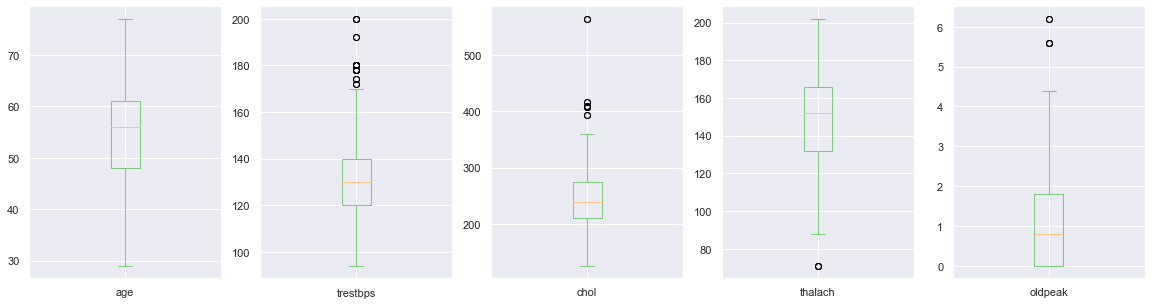

In [25]:
data_clean[num_cols].plot(
    kind='box', subplots=True, layout=(1,5), 
    sharex=False, sharey=False, figsize=(20,5)
);

Посмотрим сколько выбросов для каждого численного признака и уберем их:

In [27]:
def outliers(df: pd.DataFrame, drop: bool = False):
    without_outliers = data_clean.copy()
    for feature in df.columns:
        feature_data = data_clean[feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 #Interquartile Range
        out_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - out_step) & (feature_data <= Q3 + out_step))].index.tolist()  
        if not drop:
            print(f'For the feature {feature}, No of Outliers is {len(outliers)}')
        if drop:
            without_outliers.drop(outliers, inplace = True)
            print(f'Outliers from {feature} feature removed({len(outliers)})')
    return without_outliers

data_clean = outliers(data_clean[num_cols], drop=True)

Outliers from age feature removed(0)
Outliers from trestbps feature removed(21)
Outliers from chol feature removed(11)
Outliers from thalach feature removed(3)
Outliers from oldpeak feature removed(5)


In [28]:
data_clean.shape

(683, 14)

# 4. Распределения и корреляция

### 4.1 Распределение таргета

In [29]:
data_clean[target].value_counts()

1    350
0    333
Name: target, dtype: int64

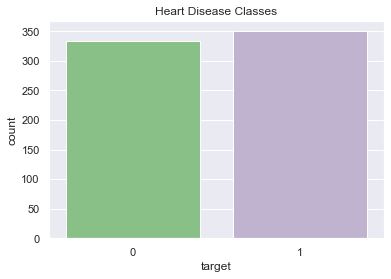

In [31]:
sns.countplot(data=data_clean, x=target)
plt.title('Heart Disease Classes');

Видно, что классы достаточно **сбалансированы**.

### 4.2 Распределение возраста

Text(0.5, 1.0, 'Age Distribution')

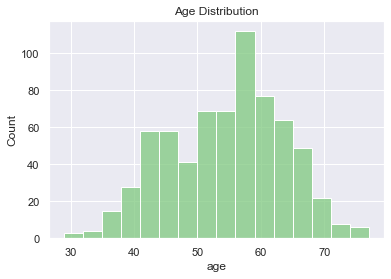

In [32]:
sns.histplot(data_clean['age'])
plt.title('Age Distribution')

### 4.3 Распределение категориальных признаков.

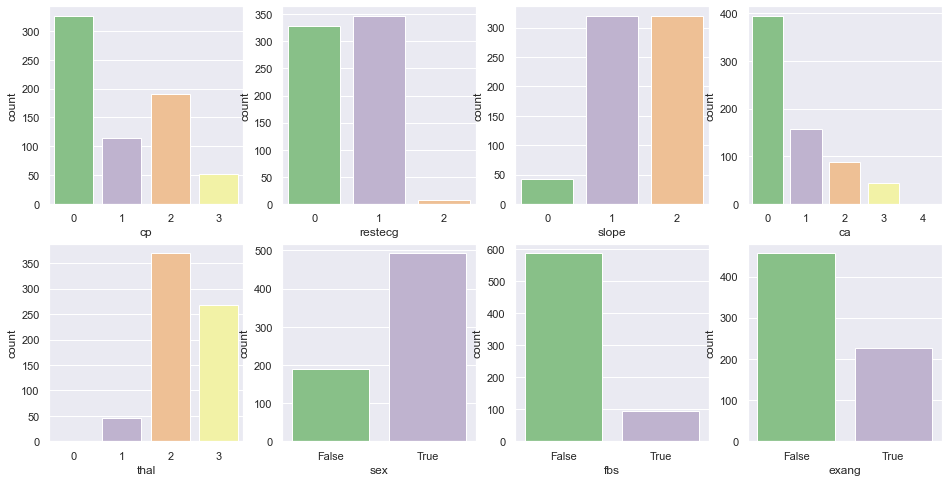

In [33]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
features = cat_cols + bin_cols
for i, col in enumerate(features):
    ax = axes[int(i/4), i%4]
    sns.countplot(data=data_clean, ax=ax, x=col)

Распределение таргета в зависимости от значений признаков:

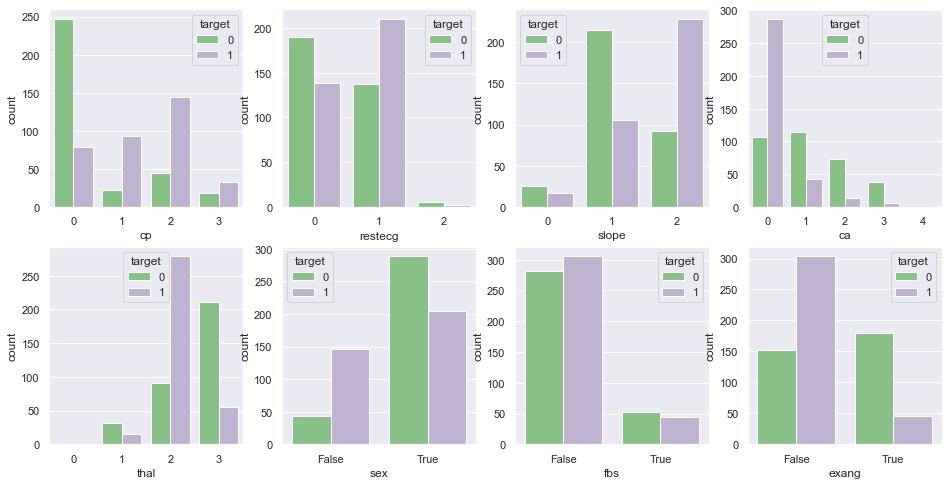

In [34]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
features = cat_cols + bin_cols
for i, col in enumerate(features):
    ax = axes[int(i/4), i%4]
    sns.countplot(data=data_clean, ax=ax, x=col, hue=target)

Если судить по графикам, значение таргета зависит от значений таких признаков как: `cp`, `slope`, `ca`, `thal`, `sex`, `exang`, `restecg`

### 4.4 Распределение численных признаков

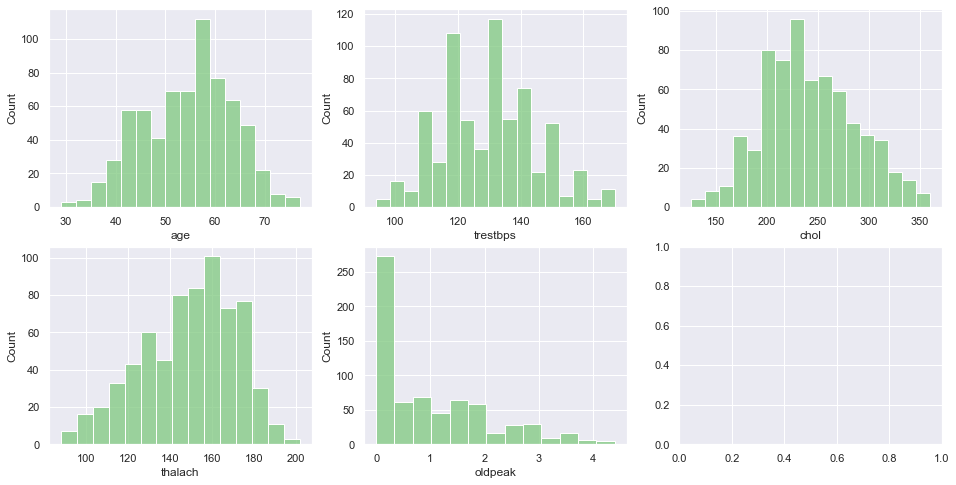

In [35]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/3), i%3]
    sns.histplot(data_clean, x=col, ax=ax)

Распределение признаков `age` и `chol` похоже на нормальное.

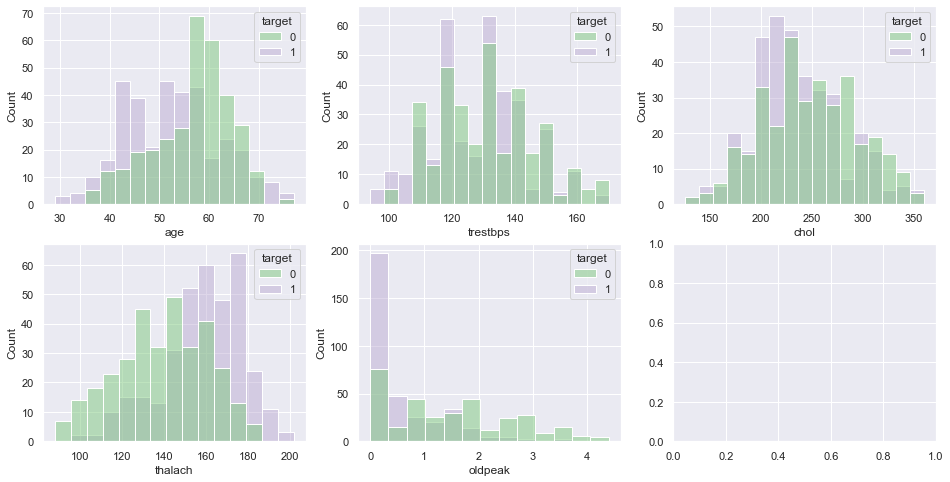

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/3), i%3]
    sns.histplot(data_clean, x=col, ax=ax, hue=target)

Судя по графикам, распределения `age`, `thalach` зависят от значения таргета.

1. `age` с заболеванием ниже, чем здоровых.
2. `thalach` c заболеванием выше, чем здоровых.

Построим **Q-Q Plot** для числовых признаков:

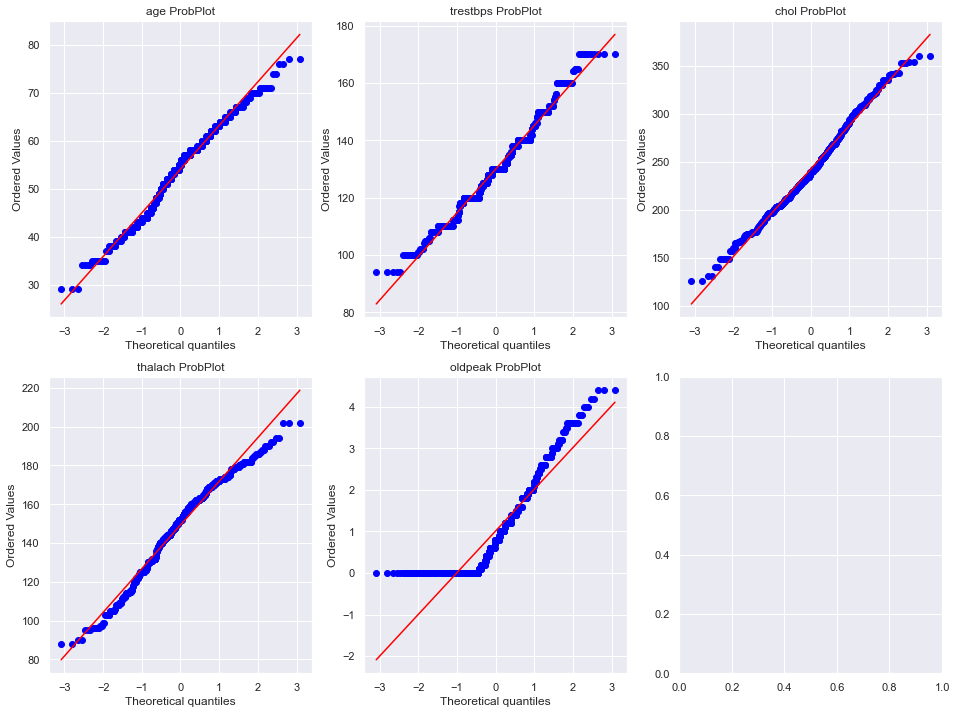

In [37]:
from scipy.stats import probplot
import pylab

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,12))
for i, col in enumerate(num_cols):
    ax = axes[int(i/3), i%3]
    probplot(data_clean[col], dist="norm", plot=ax)
    ax.set_title(col + ' ProbPlot')

Можно увидеть что распределение `age` и `chol` приближено к нормальному.

### 4.5 Scatter-Matrix для числовых признаков

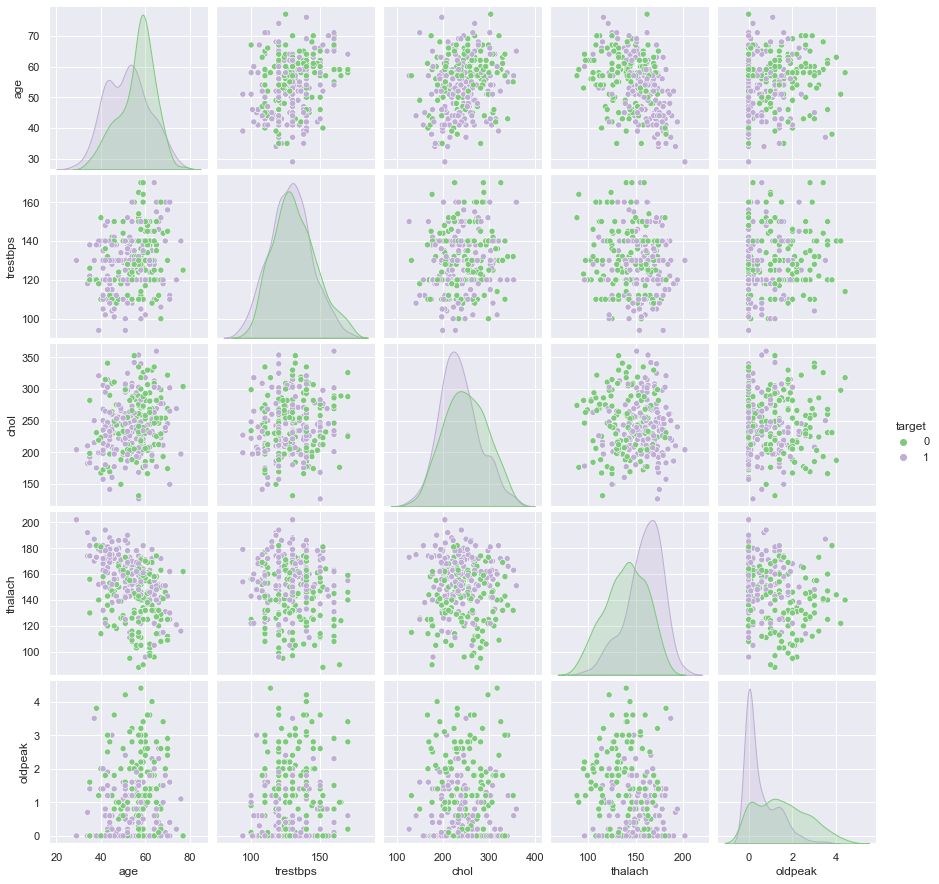

In [38]:
sns.pairplot(data=data_clean[num_cols+[target]], hue=target)

### 4.6 Хитмап для корреляций числовых признаков

<AxesSubplot:>

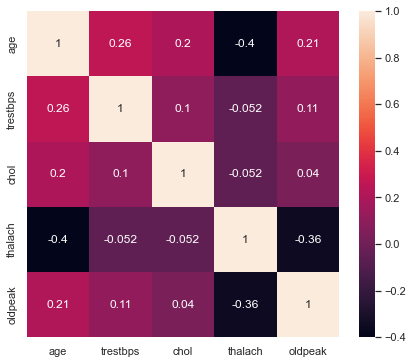

In [39]:
plt.figure(figsize=(7,6))
sns.heatmap(data_clean[num_cols].corr(), annot=True)

Коррелируют следующие признаки:
* `oldpeak` - `thalach`
* `age` - `oldpeak`, `thalach`, `chol`, `trestbps`

# 5. Гипотезы и их проверка.

### 5.1 Проверка на нормальность распределения.

Тест: **Шапиро-Уилка**

Ограничения: наблюдения независимы и одинаково распределены.

**H_0**: выборка имеет Гаусовское распределение \
**H_1**: распределение выборки отлично от Гаусовского

In [40]:
from scipy.stats import shapiro

def shapiro_test(data: pd.Series, alpha: float = 0.05):
    stat, p = shapiro(data)
    print(f"stat={stat:.3f}, p={p}")
    
    if p > alpha:
        print('Нет достаточных доказательств, чтобы отвергнуть H_0')
    else:
        print('Отвергаем H_0 => принимаем H_1(альтернативу)')

Проверим предположение выше, что распределение `age` и `chol` нормальное.

In [44]:
shapiro_test(data_clean['age'])

stat=0.985, p=2.0143365873082075e-06
Отвергаем H_0 => принимаем H_1(альтернативу)


In [45]:
shapiro_test(data_clean['chol'])

stat=0.991, p=0.0003065322816837579
Отвергаем H_0 => принимаем H_1(альтернативу)


То есть, наши предположения не верны и распределения `age` и `chol` нашей выборки **отличны от нормального**.

### 5.2 Проверка на корреляцию.

Тест: **Пирсона**

Ограничения: 
* наблюдения независимы и одинаково распределены
* наблюдения нормально распределены
* наблюдения имеют одинаковые дисперсии

H_0: две выборки независимы \
H_1: существует зависимость между выборками

Ранее предположили:
* `oldpeak` - `thalach`
* `age` - `oldpeak`, `thalach`, `chol`, `trestbps`

In [46]:
from scipy.stats import pearsonr

def pearson_test(data1: pd.Series, data2: pd.Series, alpha: float = 0.05):
    stat, p = pearsonr(data1, data2)
    print(f"stat={stat:.3f}, p={p:.3f}")
    
    if p > alpha:
        print('Нет достаточных доказательств, чтобы отвергнуть H_0 => независимы')
    else:
        print('Отвергаем H_0 => принимаем H_1 => зависимы')

In [47]:
pearson_test(data_clean['oldpeak'], data_clean['thalach'])

stat=-0.356, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [48]:
pearson_test(data_clean['age'], data_clean['oldpeak'])

stat=0.209, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [49]:
pearson_test(data_clean['age'], data_clean['thalach'])

stat=-0.400, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [50]:
pearson_test(data_clean['age'], data_clean['chol'])

stat=0.197, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [51]:
pearson_test(data_clean['age'], data_clean['trestbps'])

stat=0.262, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


Проверим также:
* `trestbps` - `chol`, `oldpeak`
* `chol` - `thalach`

In [52]:
pearson_test(data_clean['trestbps'], data_clean['oldpeak'])

stat=0.109, p=0.004
Отвергаем H_0 => принимаем H_1 => зависимы


In [53]:
pearson_test(data_clean['trestbps'], data_clean['chol'])

stat=0.103, p=0.007
Отвергаем H_0 => принимаем H_1 => зависимы


In [54]:
pearson_test(data_clean['chol'], data_clean['thalach'])

stat=-0.052, p=0.171
Нет достаточных доказательств, чтобы отвергнуть H_0 => независимы


Тест: **Хи-квадрат**

Ограничения: 
* наблюдения независимы
* 25 или более примеров в каждой ячейке таблицы crosstab

H_0: две выборки независимы \
H_1: существует зависимость между выборками

Гипотеза: сущетвует зависимость наличия болезни сердца от следующих признаков: `cp`, `slope`, `ca`, `thal`, `sex`, `exang`, `restecg`

In [55]:
from scipy.stats import chi2_contingency

def chi2_test(data1: pd.Series, data2: pd.Series, alpha: float = 0.05):
    crosstab = pd.crosstab(data1, data2)
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(f"stat={stat:.3f}, p={p:.3f}")
    
    if p > alpha:
        print('Нет достаточных доказательств, чтобы отвергнуть H_0 => независимы')
    else:
        print('Отвергаем H_0 => принимаем H_1 => зависимы')

In [56]:
chi2_test(data_clean[target], data_clean['ca'])

stat=178.211, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [57]:
chi2_test(data_clean[target], data_clean['slope'])

stat=97.133, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [58]:
chi2_test(data_clean[target], data_clean['cp'])

stat=186.505, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [59]:
chi2_test(data_clean[target], data_clean['thal'])

stat=190.766, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [60]:
chi2_test(data_clean[target], data_clean['sex'])

stat=67.621, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [61]:
chi2_test(data_clean[target], data_clean['exang'])

stat=127.160, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


In [62]:
chi2_test(data_clean[target], data_clean['restecg'])

stat=25.194, p=0.000
Отвергаем H_0 => принимаем H_1 => зависимы


По графикам на значение таргета не зависит от значений `fbs`.

Проверим это:

In [63]:
chi2_test(data_clean[target], data_clean['fbs'])

stat=1.069, p=0.301
Нет достаточных доказательств, чтобы отвергнуть H_0 => независимы


### 5.3 Параметрические тесты

Тест: **t-test**

Ограничения:
* наблюдения независимы
* наблюдения в каждой выборке нормально распределены
* наблюдения имеют одинаковые дисперсии



**Гипотеза:** средний `возраст` здоровых выше, чем средний возраст больных. \
Берем распределение `age` в зависимости от `target`(1 - Group1, 0 - Group0):

H_0:  mean(Group0) <= mean(Group1) \
H_1: mean(Group0) > mean(Group1)

In [64]:
from scipy.stats import ttest_ind, mannwhitneyu
group0 = data_clean[data_clean[target]==0]['age']
group1 = data_clean[data_clean[target]==1]['age']

alpha = 0.05

stat, p = ttest_ind(group0, group1, alternative='greater')
print(f"stat={stat:.3f}, p={p:.3f}")
if p > alpha:
    print('Нет достаточных доказательств, чтобы отвергнуть H_0')
else:
    print('Отвергаем H_0 => принимаем H_1')

stat=6.224, p=0.000
Отвергаем H_0 => принимаем H_1


### 5.4 Непараметрические тесты

**Гипотеза:** средняя `максимальная частота сердечных сокращений` здоровых ниже, чем больных. \

Берем распределение `thalach` в зависимости от `target`(1 - Group1, 0 - Group0):

H_0:  mean(Group0) >= mean(Group1) \
H_1: mean(Group0) < mean(Group1)

In [72]:
from scipy.stats import mannwhitneyu

group0 = data_clean.loc[data_clean[target] == 0, 'thalach']
group1 = data_clean.loc[data_clean[target] == 1, 'thalach']

alpha = 0.05

stat, p = mannwhitneyu(group0, group1, alternative='less')
print(f"stat={stat:.3f}, p={p:.3f}")
if p > alpha:
    print('Нет достаточных доказательств, чтобы отвергнуть H_0')
else:
    print('Отвергаем H_0 => принимаем H_1')

stat=29172.000, p=0.000
Отвергаем H_0 => принимаем H_1
